In [40]:
import numpy as np
import matplotlib.pyplot as plt

#Colorblind friendly colors
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

# PARAMETERS to Change
# Data
name = 'Core'   #'Full' or 'Core'

if name == 'Full':
    # TAP1-Full
    # Save location
    savedir = "C:\\Users\\laf62\\Desktop\\LAF-Drive\\Yale_University\\Bewersdorf_Lab\\Tampe-Collab\\cluster-analysis"
    # File path to folder containing csv files with cluster measurements
    ddir = ["C:\\Users\\laf62\\Desktop\\LAF-Drive\\Yale_University\\Bewersdorf_Lab\\Tampe-Collab\\ROI1_cluster_measures.csv"]
    ddir_stand = ["C:\\Users\\laf62\\Desktop\\LAF-Drive\\Yale_University\\Bewersdorf_Lab\\Tampe-Collab\\ROI2_background-standard_cluster_measures.csv"]
elif name == 'Core':
    #TAP1-Core
    # Save location
    savedir = "C:\\Users\\laf62\\Desktop\\LAF-Drive\\Yale_University\\Bewersdorf_Lab\\Tampe-Collab\\TAP1-Core\\cluster-analysis"
    # File path to folder containing csv files with cluster measurements
    ddir = ["C:\\Users\\laf62\\Desktop\\LAF-Drive\\Yale_University\\Bewersdorf_Lab\\Tampe-Collab\\TAP1-Core\\cluster-analysis\\TAP1-Core_ROI1_measure_clusters.csv"]
    ddir_stand = ["C:\\Users\\laf62\\Desktop\\LAF-Drive\\Yale_University\\Bewersdorf_Lab\\Tampe-Collab\\TAP1-Core\\cluster-analysis\\TAP1-Core_ROI2-background_measure_clusters.csv"]
ver = 'V1' #version name for files to not overwrite old ones
fnum = 1 #number of files to read
    
params = {'datadir': ddir, 'savedir': savedir}
params_stand = {'datadir': ddir_stand, 'savedir': savedir}

In [41]:
# Function to read .csv file from measure_clusters3D
def read_clusters(params):
    # Read data except for axes which are more involved
    clust_data = []
    cluster_output_all = []
    circ_sims_all = []
    line_sims_all = []
    adj_sims_all = []
    for dt in range(len(params['datadir'])):
        c_data = np.genfromtxt(params['datadir'][dt], delimiter = ',')
        clust = {"count": c_data[:,0], "x": c_data[:,1], "y": c_data[:,2], "z": c_data[:,3], "gyrationRadius": c_data[:,4], 
                "median_abs_deviation": c_data[:,5], "sigma0": c_data[:,9], "sigma1": c_data[:,10], "sigma2": c_data[:,11], 
                "sigma_x": c_data[:,12], "sigma_y": c_data[:,13], "sigma_z": c_data[:,14], "anisotropy": c_data[:,15], 
                "theta": c_data[:,16], "phi": c_data[:,17]}

        #making save-folder if it doesn't exist (DON'T TOUCH THE NEXT 5 LINES)
        from pathlib import Path
        import os
        p = Path(params['savedir'])
        if not p.exists():
            os.mkdir(params['savedir'])
        workdir = os.getcwd()

        import pandas as pd
        import copy

        if 'check1' in locals():
            del check1
        if 'check2' in locals():
            del check2
        if 'x' in locals():
            del x
        if 'y' in locals():
            del y
        if 'z' in locals():
            del z

        # Initialize variables
        csv_file = pd.read_csv(params['datadir'][dt], sep=',', header=None)
        clusto = {"axis0": np.copy(csv_file[6][1:].values), "axis1": np.copy(csv_file[7][1:].values), 
                  "axis2": np.copy(csv_file[8][1:].values)}
        clust['axis0'] = np.zeros((len(clust['count']),3))
        clust['axis1'] = np.zeros((len(clust['count']),3))
        clust['axis2'] = np.zeros((len(clust['count']),3))


        # Convert 'axis0', 'axis1', and 'axis2' values to floats from strings
        # axis0
        for a in range(len(clusto["axis0"])):
            #print('a:',a)
            if a > 0:
                del x,y,z,check1,check2
            if clusto['axis0'][a][2:4] == '[ ': 
                for b in range(1,len(clusto['axis0'][a])):
                    if clusto['axis0'][a][b] == ' ' and 'check1' not in locals():
                        check1 = b
                    elif clusto['axis0'][a][b] == ' ' and 'check2' not in locals():
                        x = float(clusto['axis0'][a][3:b])
                        check2 = b
                    elif clusto['axis0'][a][b] == ' ' and clusto['axis0'][a][b-1] != ' ' and 'check2' in locals() and 'y' not in locals():             
                        y = float(clusto['axis0'][a][check2:b])
                        z = float(clusto['axis0'][a][b:-2])
            elif clusto['axis0'][a][2] == '[' and clusto['axis0'][a][3] != ' ': 
                for b in range(1,len(clusto['axis0'][a])):
                    if clusto['axis0'][a][b] == ' ' and 'check1' not in locals():
                        check1 = b
                        x = float(clusto['axis0'][a][3:b])
                    elif clusto['axis0'][a][b] == ' ' and clusto['axis0'][a][b-1] != ' ' and 'check2' not in locals() and 'y' not in locals():# 'check2' not in locals():
                        y = float(clusto['axis0'][a][check1:b])
                        z = float(clusto['axis0'][a][b:-2])
                        check2 = b
            clust['axis0'][a] = np.array([x, y, z])
        del check1, check2, x, y, z, a, b

        # axis1
        for c in range(len(clusto["axis1"])):
            if c > 0:
                del x,y,z,check1,check2
            if clusto['axis1'][c][2:4] == '[ ': 
                for d in range(1,len(clusto['axis1'][c])):
                    if clusto['axis1'][c][d] == ' ' and 'check1' not in locals():
                        check1 = d
                    elif clusto['axis1'][c][d] == ' ' and 'check2' not in locals():
                        x = float(clusto['axis1'][c][3:d])
                        check2 = d
                    elif clusto['axis1'][c][d] == ' ' and clusto['axis1'][c][d-1] != ' ' and 'check2' in locals() and 'y' not in locals():             
                        y = float(clusto['axis1'][c][check2:d])
                        z = float(clusto['axis1'][c][d:-2])
            elif clusto['axis1'][c][2] == '[' and clusto['axis1'][c][3] != ' ': 
                for d in range(1,len(clusto['axis1'][c])):
                    if clusto['axis1'][c][d] == ' ' and 'check1' not in locals():
                        check1 = d
                        x = float(clusto['axis1'][c][3:d])
                    elif clusto['axis1'][c][d] == ' ' and clusto['axis1'][c][d-1] != ' ' and 'check2' not in locals() and 'y' not in locals():# 'check2' not in locals():
                        y = float(clusto['axis1'][c][check1:d])
                        z = float(clusto['axis1'][c][d:-2])
                        check2 = d
            clust['axis1'][c] = np.array([x, y, z])
        del check1, check2, x, y, z, c, d

        # axis2
        for e in range(len(clusto["axis2"])):
            if e > 0:
                del x,y,z,check1,check2
            if clusto['axis2'][e][2:4] == '[ ':
                for f in range(1,len(clusto['axis2'][e])):
                    if clusto['axis2'][e][f] == ' ' and 'check1' not in locals():
                        check1 = f
                    elif clusto['axis2'][e][f] == ' ' and 'check2' not in locals():
                        x = float(clusto['axis2'][e][3:f])
                        check2 = f
                    elif clusto['axis2'][e][f] == ' ' and clusto['axis2'][e][f-1] != ' ' and 'check2' in locals() and 'y' not in locals():             
                        y = float(clusto['axis2'][e][check2:f])
                        z = float(clusto['axis2'][e][f:-2])
            elif clusto['axis2'][e][2] == '[' and clusto['axis2'][e][3] != ' ':
                for f in range(1,len(clusto['axis2'][e])):
                    if clusto['axis2'][e][f] == ' ' and 'check1' not in locals():
                        check1 = f
                        x = float(clusto['axis2'][e][3:f])
                    elif clusto['axis2'][e][f] == ' ' and clusto['axis2'][e][f-1] != ' ' and 'check2' not in locals() and 'y' not in locals():# 'check2' not in locals():
                        y = float(clusto['axis2'][e][check1:f])
                        z = float(clusto['axis2'][e][f:-2])
                        check2 = f
            clust['axis2'][e] = np.array([x, y, z])

        clust_data.append(clust)
        return clust_data

In [42]:
# Read csv files
clusts = read_clusters(params)
clusts_stand = read_clusters(params_stand)

In [50]:
# Calculate number of proteins per cluster
med_stand = np.median(clusts_stand[0]['count'])
nProtein = clusts[0]['count']/med_stand

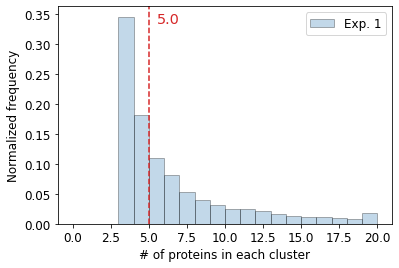

In [51]:
plt.rcParams.update({'font.size': 12})
for c in range(fnum):
    med = np.median(nProtein)
    n, bins, patches = plt.hist(x=nProtein,bins=20, alpha=0.3, rwidth=1, density=True, 
                                color=CB_color_cycle[c],range=(0,20), 
                                label='Exp. ' + str(int(c+1)),edgecolor='k' )

    n_max = np.max(n,axis=0)
    plt.axvline(x=med, linestyle='--',color='tab:red',alpha=1)
    plt.text(med+0.5,np.max(n_max)-0.01,str(np.round(med,2)),color='tab:red', fontsize='large')
    plt.xlabel('# of proteins in each cluster')
    plt.ylabel('Normalized frequency')
    plt.legend()
    hist_save = savedir + '\\' + dname + '_'+str(int(c+1))+'hist_' + ver + '.png'
    plt.savefig(hist_save, dpi=600, facecolor='w', edgecolor='w',
            orientation='portrait', format=None,
            transparent=False, bbox_inches=None, pad_inches=0.1, metadata=None)
    plt.show()
    plt.close(fig=None)

In [48]:
med_stand

1.1818181818181819